# Домашняя работа №4

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Для датасета kaggle, Credit Card Fraud Detection

**1. Загрузить датасет**

Источник данных - https://www.kaggle.com/mlg-ulb/creditcardfraud/download

In [2]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Исходя из данных о датасете, в нём отсутствуют пустые значения и строковые данные

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

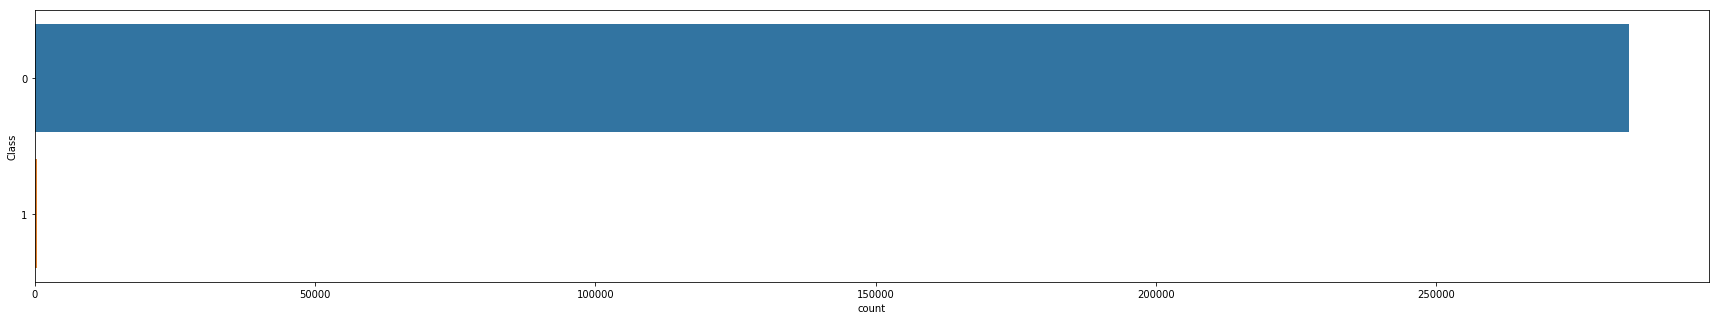

In [4]:
count_by_class = df.groupby(by='Class').agg(count=('Class', 'count')).reset_index()

plt.figure(figsize=(30, 5))
sns.barplot(x='count', y='Class', data=count_by_class, orient='h')

Очевидно преобладание 0 класса над 1, что означает очень сильную разбалансировку классов

Посмотрим подсчёт классов

In [5]:
count_by_class

,Class,count
0,0,284315
1,1,492


**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

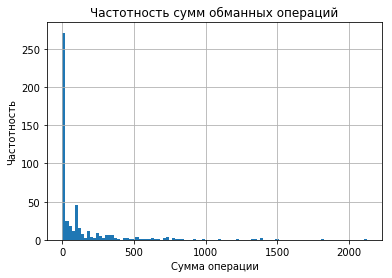

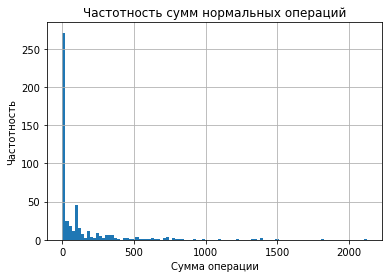

In [6]:
for i in [0, 1]:
    df[df['Class'] == 1]['Amount'].hist(bins=100)

    plt.title(f'Частотность сумм {"нормальных" if i else "обманных"} операций')
    plt.xlabel('Сумма операции')
    plt.ylabel('Частотность')
    plt.show()

**5. Построить графики histograms для всех значений**

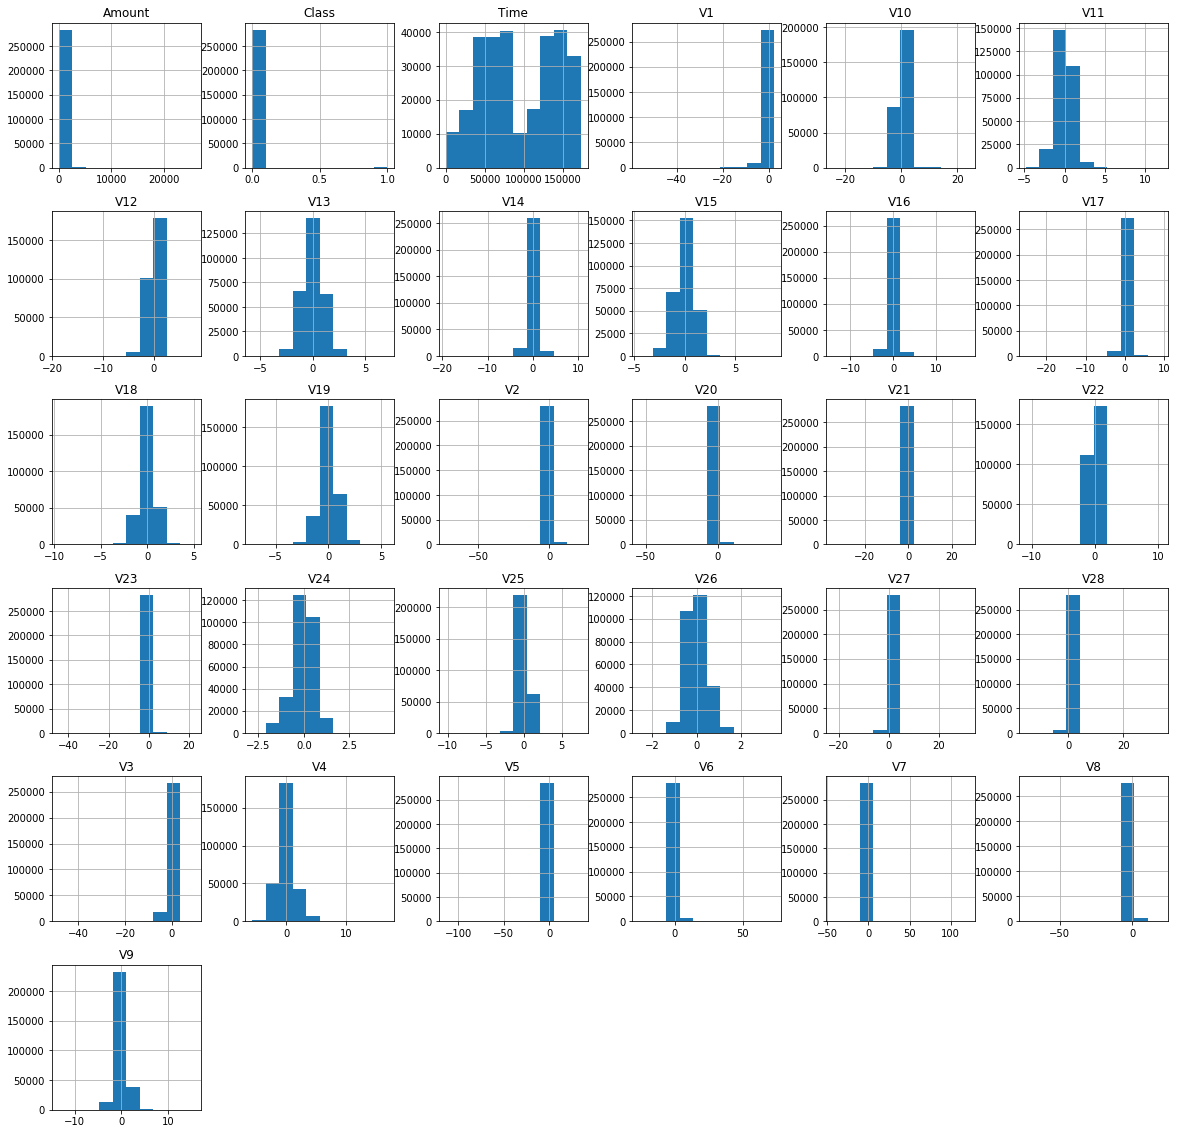

In [7]:
df.hist(figsize=(20, 20))
plt.show()

**6. Построить матрицу корреляций для всех значений**

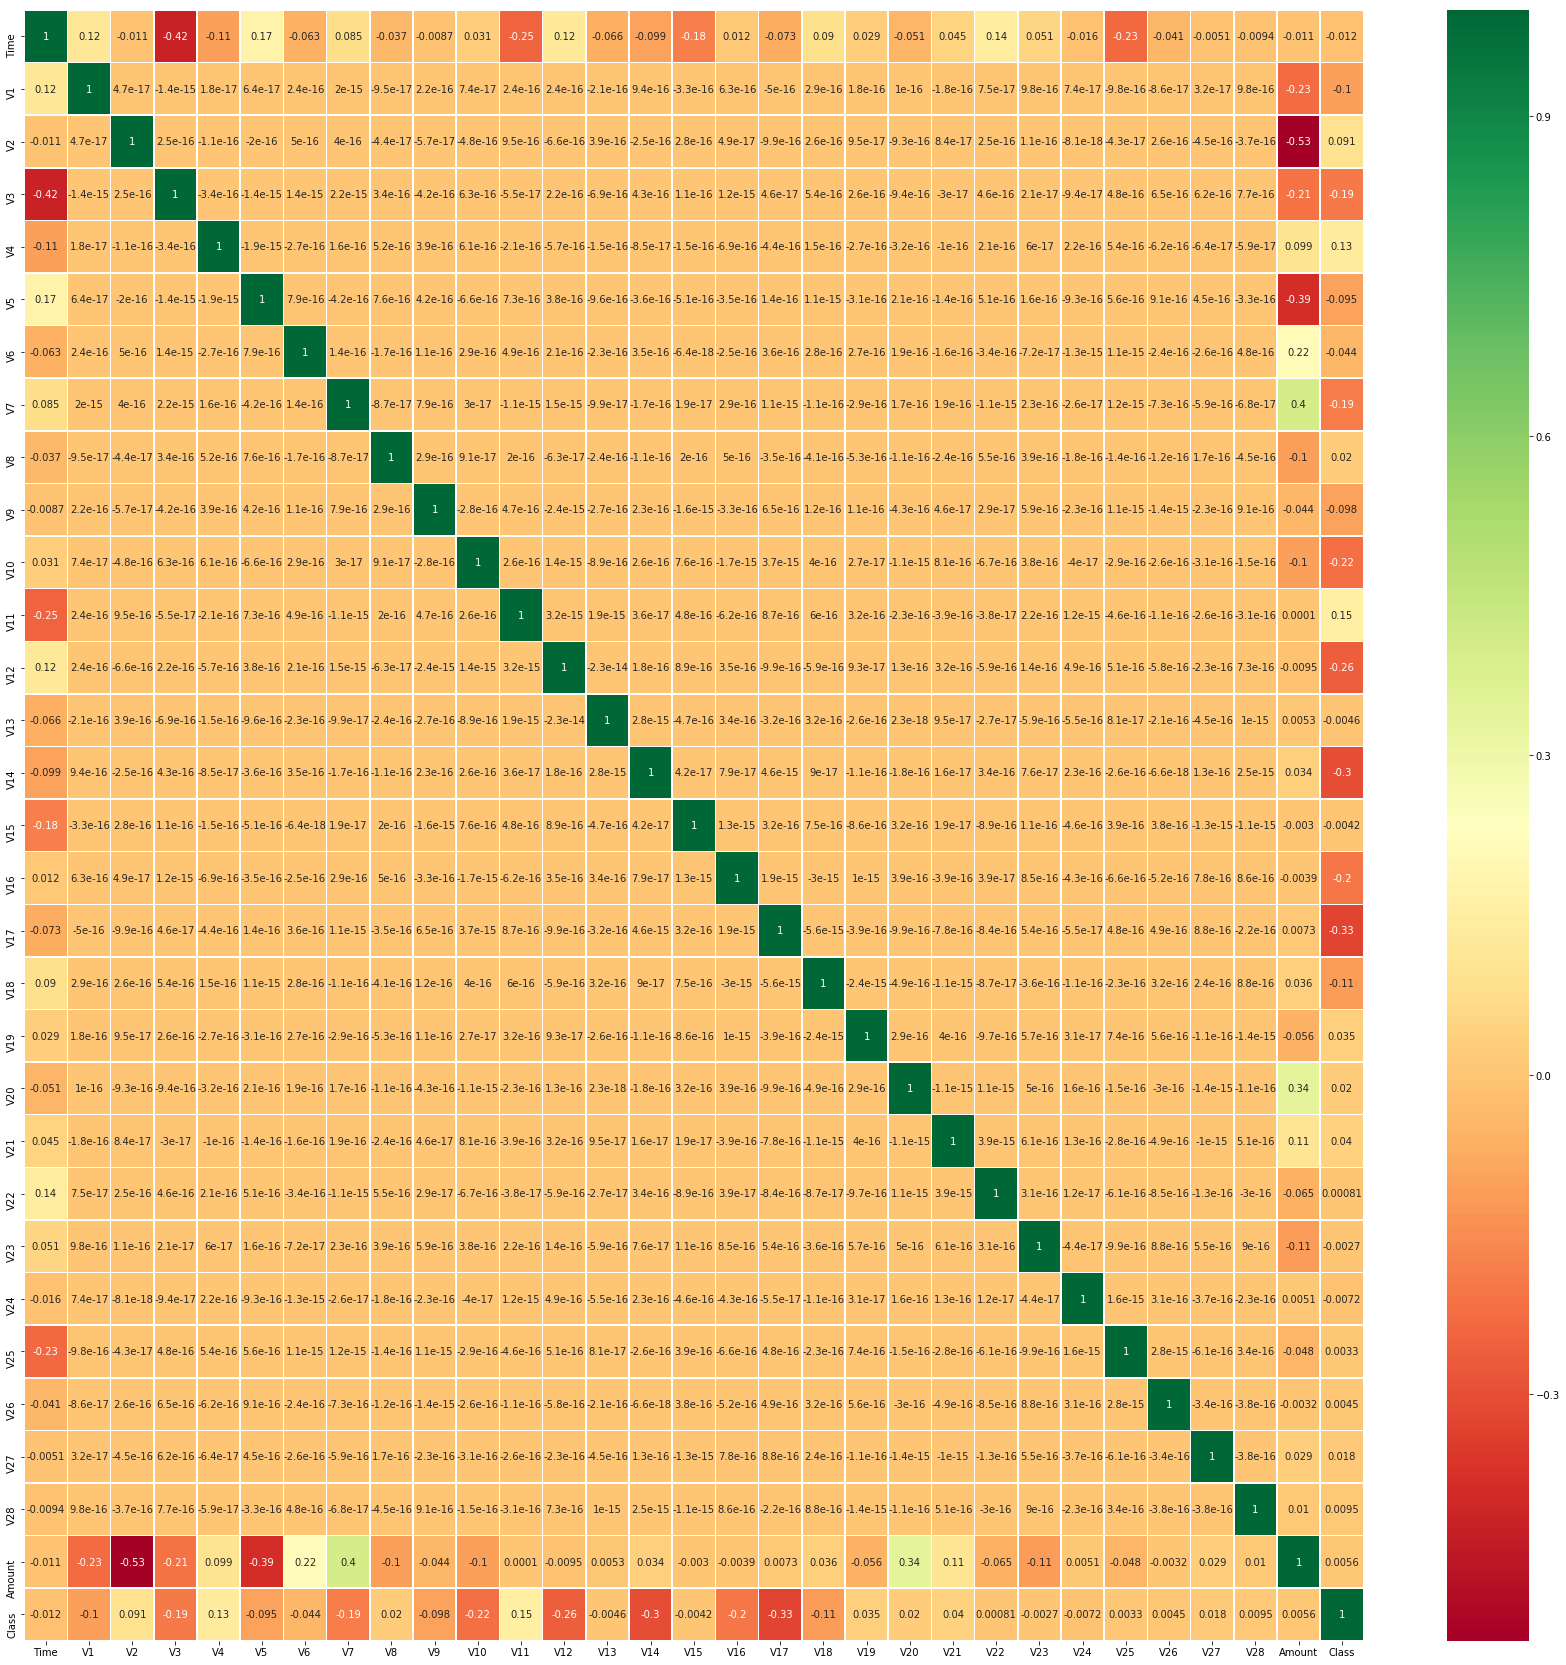

In [8]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='RdYlGn')
plt.show()

Сперва я посчитал это плохой затеей - рисовать такую огромную карту теплоты, но когда увидел её, словно влюбился. Она оч крутая)))

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель линейной регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

Наибольшую взаимосвязь с таргет-значением имеют такие переменные, как 'V17', 'V14', 'V12', 'V10'

In [9]:
from sklearn.model_selection import train_test_split

selected_columns = ['V10', 'V12', 'V14', 'V17']
x = df[selected_columns]
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3008945861336403

Точность предсказаний примерно 30%. Скорее всего так получилось из-за разбалансировки категорий и очень маленького числа обманных оплат.

Ну и ещё из-за того, что я не особо очищал данные от выбросов, слишком сильных или слишком слабых корреляций...

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать линейную регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [60]:
balanced_df_size = min(count_by_class['count'])
balanced_df_size

492

In [12]:
balanced_df = pd.concat([
    df[df['Class'] == 0].sample(balanced_df_size),
    df[df['Class'] == 1],
])

print(f'Количество класса 0: {len(balanced_df[balanced_df["Class"] == 0])}')
print(f'Количество класса 1: {len(balanced_df[balanced_df["Class"] == 1])}')

Количество класса 0: 492
Количество класса 1: 492


In [13]:
x_bal = balanced_df[selected_columns]
y_bal = balanced_df['Class']

x_bal_train, x_bal_test, y_bal_train, y_bal_test = train_test_split(x_bal, y_bal, test_size = 0.3)

In [14]:
model.fit(x_bal_train, y_bal_train)
model.score(x_bal_test, y_bal_test)

0.5870028084074443

Точность предсказания выросла почти в два раза! Теперь точность близка к 60%. Это подтверждает одну из моих гипотез на предыдущем шаге, а именно - предположение, что низкое качество модели было связано с разбалансировкой данных.

**9. Построить boxplot графики для 4ех негативно коррелирующих элементов и 4 позитивно коррелирующих элементов для полученного в шаге 8 датасете.** Пример boxplot:

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])

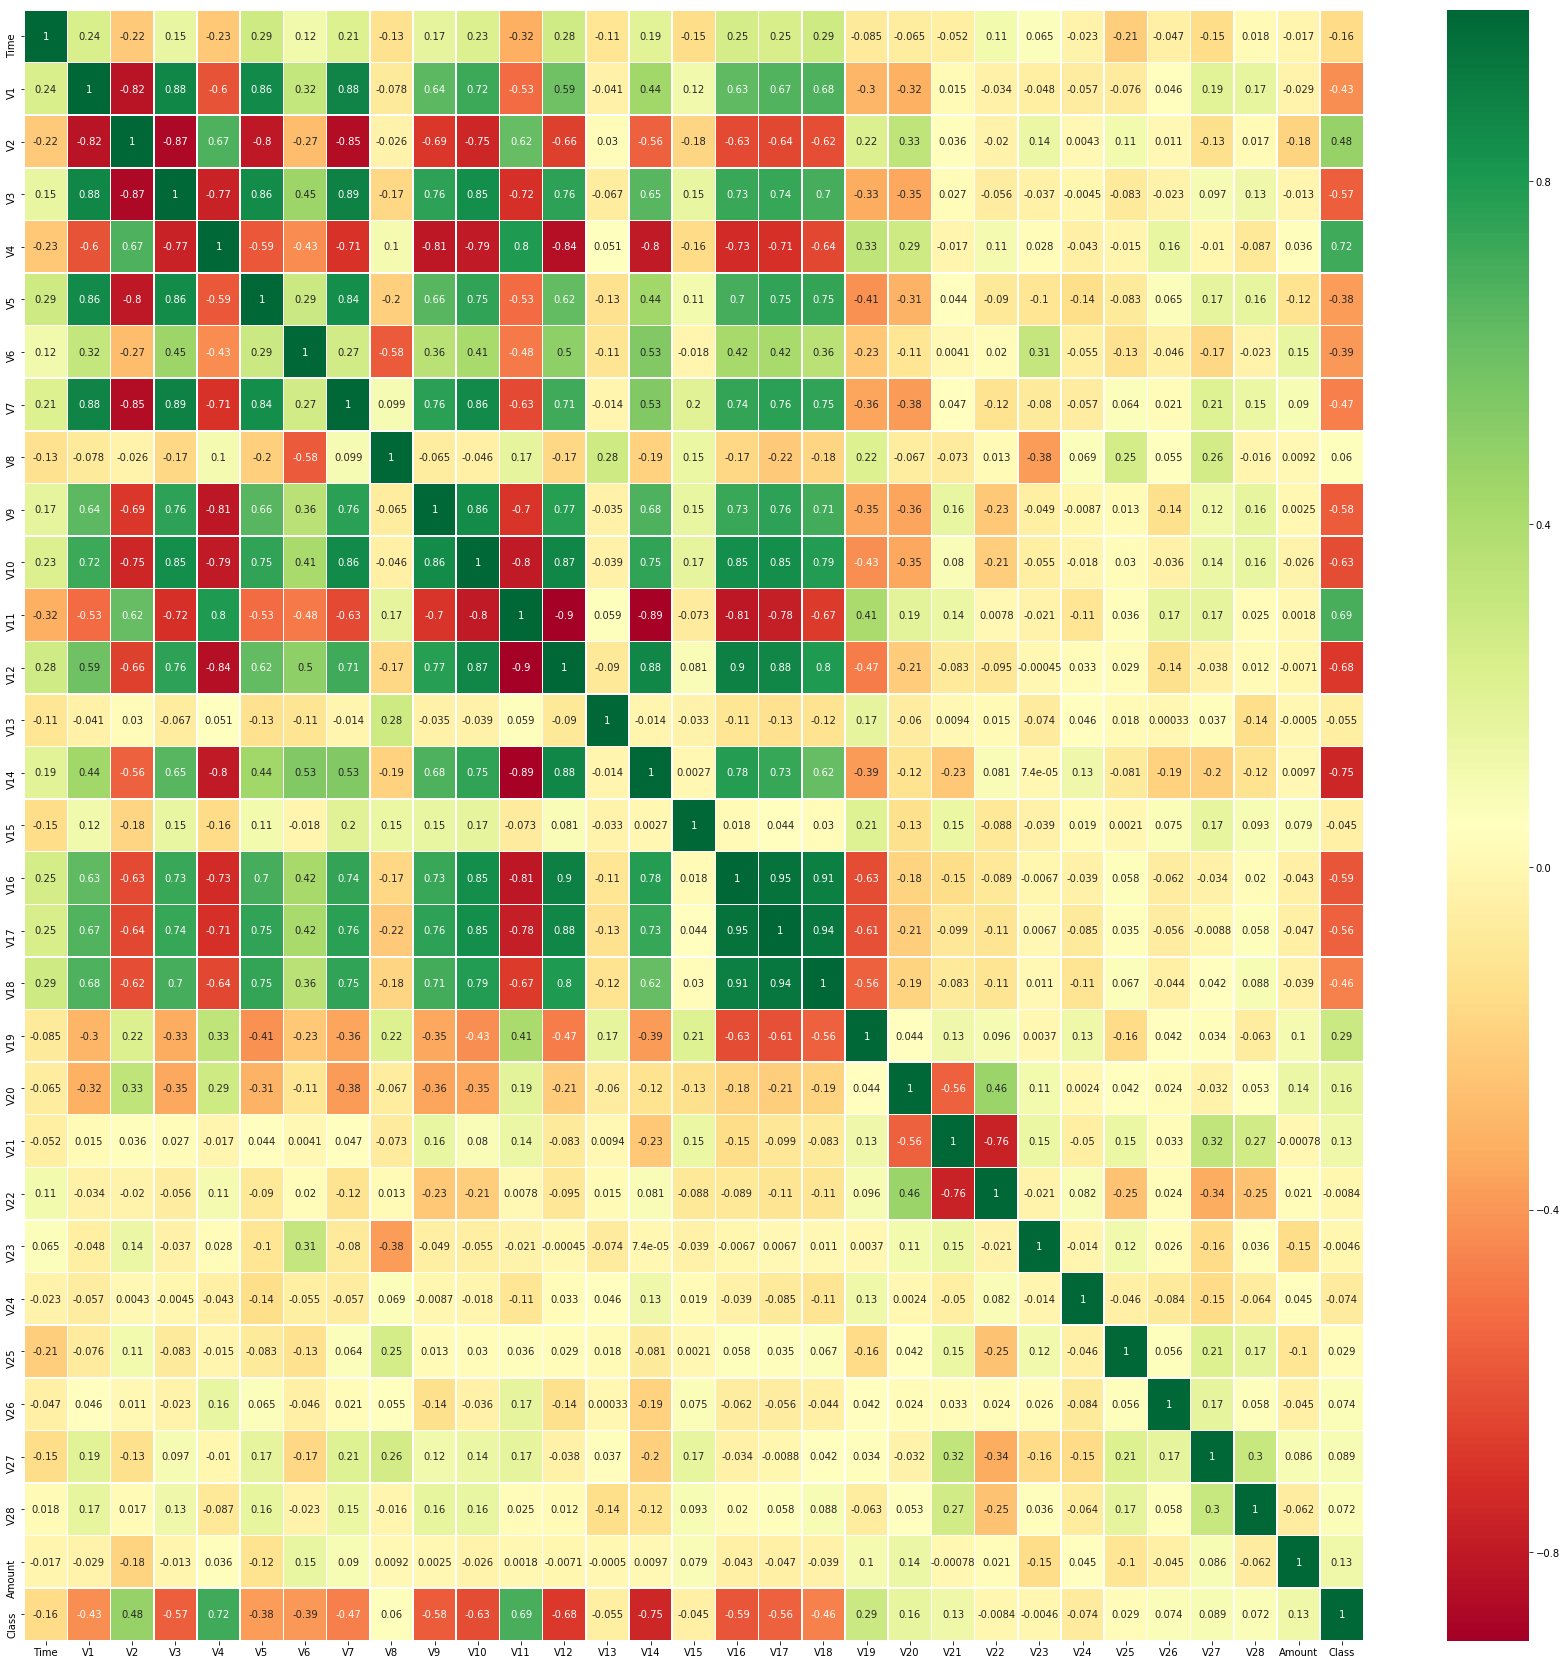

In [15]:
plt.figure(figsize=(30, 30))
sns.heatmap(balanced_df.corr(), annot=True, linewidths=0.5, cmap='RdYlGn')
plt.show()

In [83]:
from functools import reduce

pos_corr_cols = [['V1', 'V3'], ['V3', 'V10'], ['V12', 'V14'], ['V12', 'V16']]
neg_corr_cols = [['V13', 'V17'], ['V13', 'V1'], ['V19', 'V17'], ['V19', 'V3']]

barplot_columns = set(reduce(lambda res, pair: [*res, *pair], [*pos_corr_cols, *neg_corr_cols]))
barplot_columns

{'V1', 'V10', 'V12', 'V13', 'V14', 'V16', 'V17', 'V19', 'V3'}

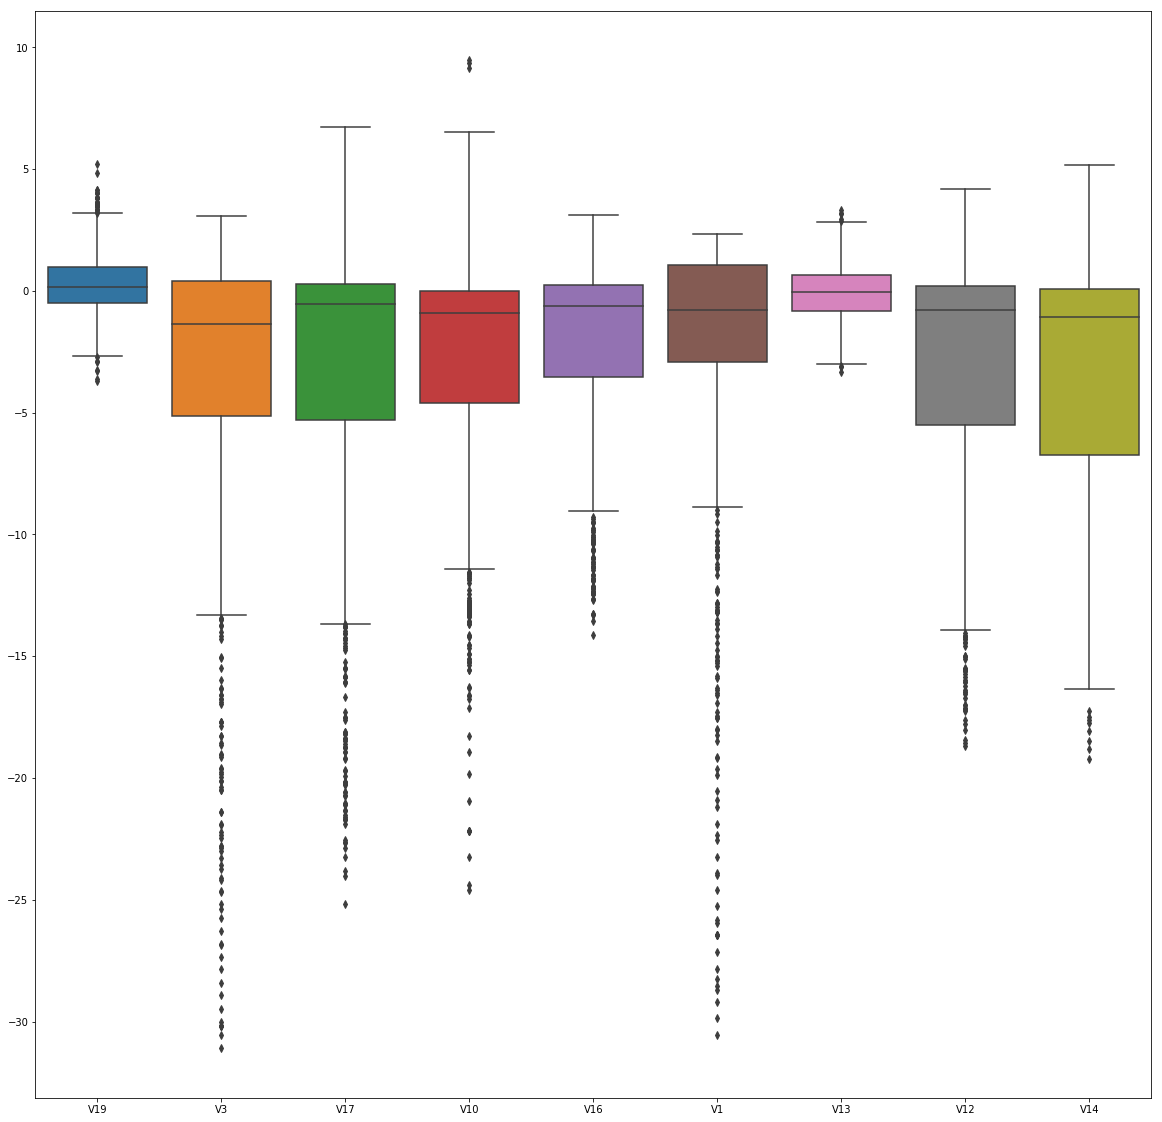

In [88]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=balanced_df[barplot_columns])

**10. Из графиков, полученных на предыдущем шаге, убрать выбросы методом выборки элементов из интерквартильного интервала (взять только те элементы, которые находятся квартилем 0.25 и квартилем 0.75).** Посчитать качество модели и сравнить с предыдущим. Получилось ли улучшить модель? Почему?

В графиках очевидно множество выбросов, надеюсь это не снизит до невозможного кол-во данных для обучения модели...

In [89]:
balanced_df.shape

(984, 31)

In [90]:
clear_balanced_df = balanced_df

quantiles = reduce(
    lambda res, col: {**res, col: clear_balanced_df[col].quantile([0.25, 0.75])},
    barplot_columns,
    {}
)

for col, quantiles in quantiles.items():
    clear_balanced_df = clear_balanced_df[(clear_balanced_df[col] >= quantiles[0.25]) & (clear_balanced_df[col] <= quantiles[0.75])]

clear_balanced_df.shape

(13, 31)

In [91]:
x_clr_bal = clear_balanced_df[selected_columns]
y_clr_bal = clear_balanced_df['Class']

x_clr_bal_train, x_clr_bal_test, y_clr_bal_train, y_clr_bal_test = train_test_split(x_clr_bal, y_clr_bal, test_size = 0.3)

In [92]:
model.fit(x_clr_bal_train, y_clr_bal_train)
model.score(x_clr_bal_test, y_clr_bal_test)

1.0

Модель стала не пригодной, т.к. появилась нехватка данных. Мне пришлось очень тщательно подбирать столбцы, опираясь на boxplot график из всех столбцов...

Возможно, я не до конца понял последнее задание, но по матрице коррелляций соложно подобрать столбцы таким образом, чтобы фильтрация по квартилям которых оставляла в датасете хоть сколько то элементов. В моём последнем кейсе их осталось всего 6. Такого количества данных критически недостаточно, чтобы обучить хоть чему-то полезному модель...